In [26]:
! pip install pytorch_lightning

In [27]:
pip install torch==2.1.1+cu121 torchvision==0.11.1+cu111 torchaudio==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==2.1.1+cu121 (from versions: none)
ERROR: No matching distribution found for torch==2.1.1+cu121


In [28]:
import torch
print(torch.cuda.is_available())


False


# Importing necessary modules and libraries

In [9]:
import os
import glob as gb
import numpy as np 
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

import pytorch_lightning as pl
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import CSVLogger
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications import MobileNetV2,VGG16
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Exploratory analysis

In [7]:
fish_path=r"C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset"

In [10]:
all_path=[] # To include the full path of each image
for img_path in os.listdir(fish_path): 
    if img_path in ['Segmentation_example_script.m','README.txt','license.txt'] :
        continue
        
    all_data=gb.glob(pathname=fish_path+'/'+img_path+'/'+img_path+'/*.*')
    print(' found {} in {} '.format(len(all_data),img_path))
    all_path.extend(all_data)

 found 1000 in Black Sea Sprat 
 found 1000 in Gilt-Head Bream 
 found 1000 in Hourse Mackerel 
 found 1000 in Red Mullet 
 found 1000 in Red Sea Bream 
 found 1000 in Sea Bass 
 found 1000 in Shrimp 
 found 1000 in Striped Red Mullet 
 found 1000 in Trout 


In [11]:
images_df=pd.DataFrame({'Filepath':all_path})
images_df['Label']=images_df['Filepath'].apply(lambda x :x.split('/')[-2])
pd.options.display.max_colwidth = 200

#shuffling and reset index
images_df = images_df.sample(frac=1).reset_index(drop = True)
images_df.head(5)

Filepath  \
0                    C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Shrimp/Shrimp\00020.png   
1      C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Sea Bream/Red Sea Bream\00374.png   
2            C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Mullet/Red Mullet\00383.png   
3  C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Hourse Mackerel/Hourse Mackerel\00060.png   
4  C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Hourse Mackerel/Hourse Mackerel\00397.png   

             Label  
0           Shrimp  
1    Red Sea Bream  
2       Red Mullet  
3  Hourse Mackerel  
4  Hourse Mackerel

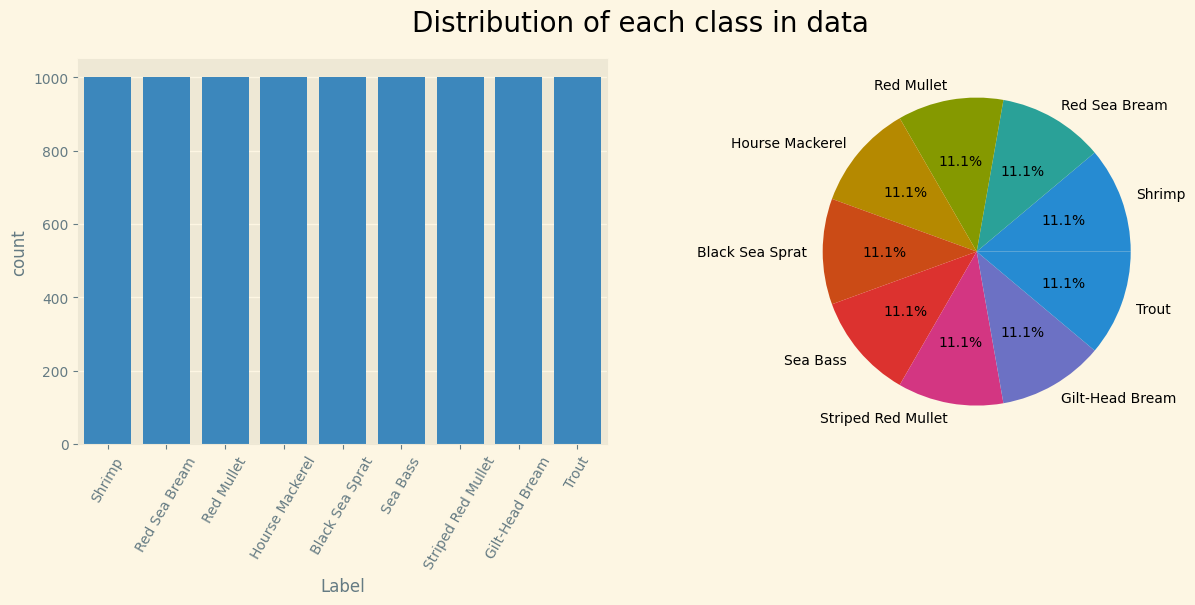

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=images_df,x='Label')
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
plt.pie(x=images_df['Label'].value_counts().values,labels=images_df['Label'].value_counts().index,autopct='%1.1f%%')
plt.suptitle('Distribution of each class in data',size=20)
plt.show()

# CLASSIFICATION USING CNN MODEL

In [1]:
import numpy as np 
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import tensorflow as tf

from pathlib import Path


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator


from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 


import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
file = Path(r"C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset") 
File_Path = list(file.glob(r"**/*.png"))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],File_Path))

File_Path = pd.Series(File_Path).astype(str)
Labels = pd.Series(Labels)
df = pd.concat([File_Path,Labels],axis=1)
df.columns = ['image', 'label']
# Drop all the images that ends with (GT)

df = df[df["label"].apply(lambda x: x[-2:] != "GT")].reset_index(drop=True)

df.head()

image            label
0  C:\Users\megav\Downloads\largescalefishdataset...  Black Sea Sprat
1  C:\Users\megav\Downloads\largescalefishdataset...  Black Sea Sprat
2  C:\Users\megav\Downloads\largescalefishdataset...  Black Sea Sprat
3  C:\Users\megav\Downloads\largescalefishdataset...  Black Sea Sprat
4  C:\Users\megav\Downloads\largescalefishdataset...  Black Sea Sprat

In [3]:

Train_set, test_set = train_test_split(df, test_size = 0.3, random_state = 42)

#splitting the train set into train and evaluation set

train_set, val_set = train_test_split(Train_set, test_size= 0.2, random_state = 42)

print(train_set.shape)
print(test_set.shape)
print(val_set.shape)

(5040, 2)
(2700, 2)
(1260, 2)


In [5]:
img_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input, rescale=1/255)


train = img_gen.flow_from_dataframe(dataframe = train_set,
    x_col = 'image', 
    y_col ='label', 
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False 
)

test = img_gen.flow_from_dataframe(dataframe = test_set,
    x_col = 'image',
    y_col ='label', 
    target_size =(224, 224),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False
)


val = img_gen.flow_from_dataframe(dataframe = val_set,
    x_col = 'image', 
    y_col ='label', 
    target_size =(224, 224),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)

Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


In [7]:
#define the input shape
input_shape = (224, 224, 3)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape = input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# add output layer
model.add(tf.keras.layers.Dense(9, activation='softmax')) #use softmax as activation in the output layer
#as it is multiclass. Sigmoid activation is used for binary and 'relu' shouldnt be use for output layer


# view model layers
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 128)               50466944  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                      

In [8]:
# compile model
model.compile(optimizer='adam', 
              loss="categorical_crossentropy", 
              metrics=['accuracy']) 

In [9]:
history = model.fit(train,
                    validation_data = val, 
                    epochs = 10,
                    verbose = 1)

Epoch 1/10


158/158 [==============================] - 1148s 7s/step - loss: 1.8092 - accuracy: 0.3226 - val_loss: 1.3262 - val_accuracy: 0.5413
Epoch 2/10
158/158 [==============================] - 800s 5s/step - loss: 1.2767 - accuracy: 0.5468 - val_loss: 1.0018 - val_accuracy: 0.6905
Epoch 3/10
158/158 [==============================] - 720s 5s/step - loss: 0.9513 - accuracy: 0.6673 - val_loss: 0.7557 - val_accuracy: 0.7333
Epoch 4/10
158/158 [==============================] - 509s 3s/step - loss: 0.7447 - accuracy: 0.7440 - val_loss: 0.5900 - val_accuracy: 0.7960
Epoch 5/10
158/158 [==============================] - 537s 3s/step - loss: 0.5852 - accuracy: 0.7938 - val_loss: 0.5154 - val_accuracy: 0.8119
Epoch 6/10
158/158 [==============================] - 4204s 27s/step - loss: 0.4754 - accuracy: 0.8381 - val_loss: 0.4660 - val_accuracy: 0.8373
Epoch 7/10
158/158 [==============================] - 432s 3s/step - loss: 0.3991 - accuracy: 0.8577 - val_loss: 0.3813 - val_accuracy: 0

Text(0.5, 1.0, 'Training and Validation Accuracy')

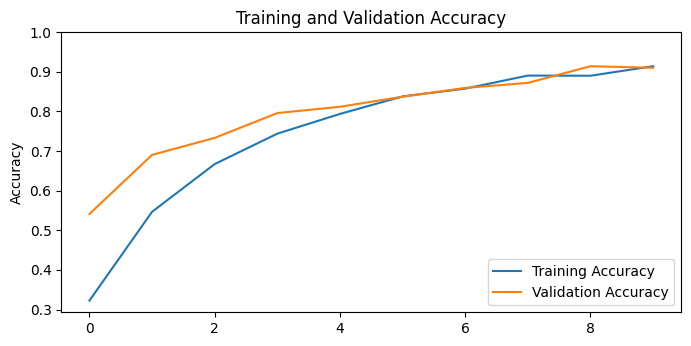

In [10]:
acc = history.history['accuracy'] 

val_acc = history.history['val_accuracy'] 

loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

plt.figure(figsize=(8, 8)) 
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy') 

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy') 

Text(0.5, 1.0, 'Training and Validation Loss')

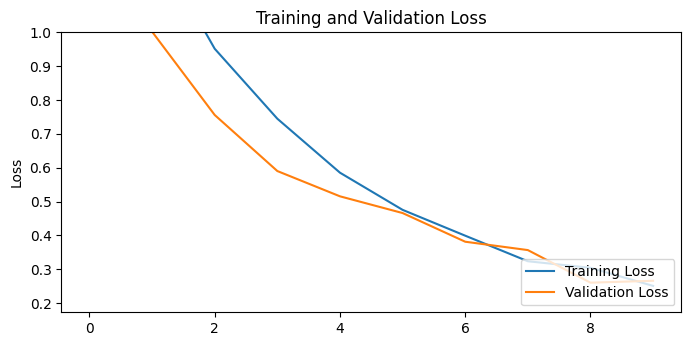

In [11]:
plt.figure(figsize=(8, 8)) 
plt.subplot(2, 1, 1)

plt.plot(loss, label='Training Loss') 
plt.plot(val_loss, label='Validation Loss') 

plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Loss')

In [12]:
# Predict the label of the test_images
pred = model.predict(test)
pred = np.argmax(pred,axis = 1)

# Map the label
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

85/85 [==============================] - 125s 1s/step


In [13]:
from sklearn.metrics import classification_report, confusion_matrix 

y_test = test_set.label # set y_test to the expected output

print(classification_report(y_test, pred2)) 

                    precision    recall  f1-score   support

   Black Sea Sprat       0.92      0.97      0.95       300
   Gilt-Head Bream       0.91      0.87      0.89       326
   Hourse Mackerel       0.85      0.87      0.86       287
        Red Mullet       0.94      0.92      0.93       288
     Red Sea Bream       0.93      0.92      0.92       296
          Sea Bass       0.89      0.95      0.92       298
            Shrimp       0.98      0.94      0.96       314
Striped Red Mullet       0.93      0.83      0.88       297
             Trout       0.89      0.97      0.93       294

          accuracy                           0.92      2700
         macro avg       0.92      0.92      0.92      2700
      weighted avg       0.92      0.92      0.92      2700



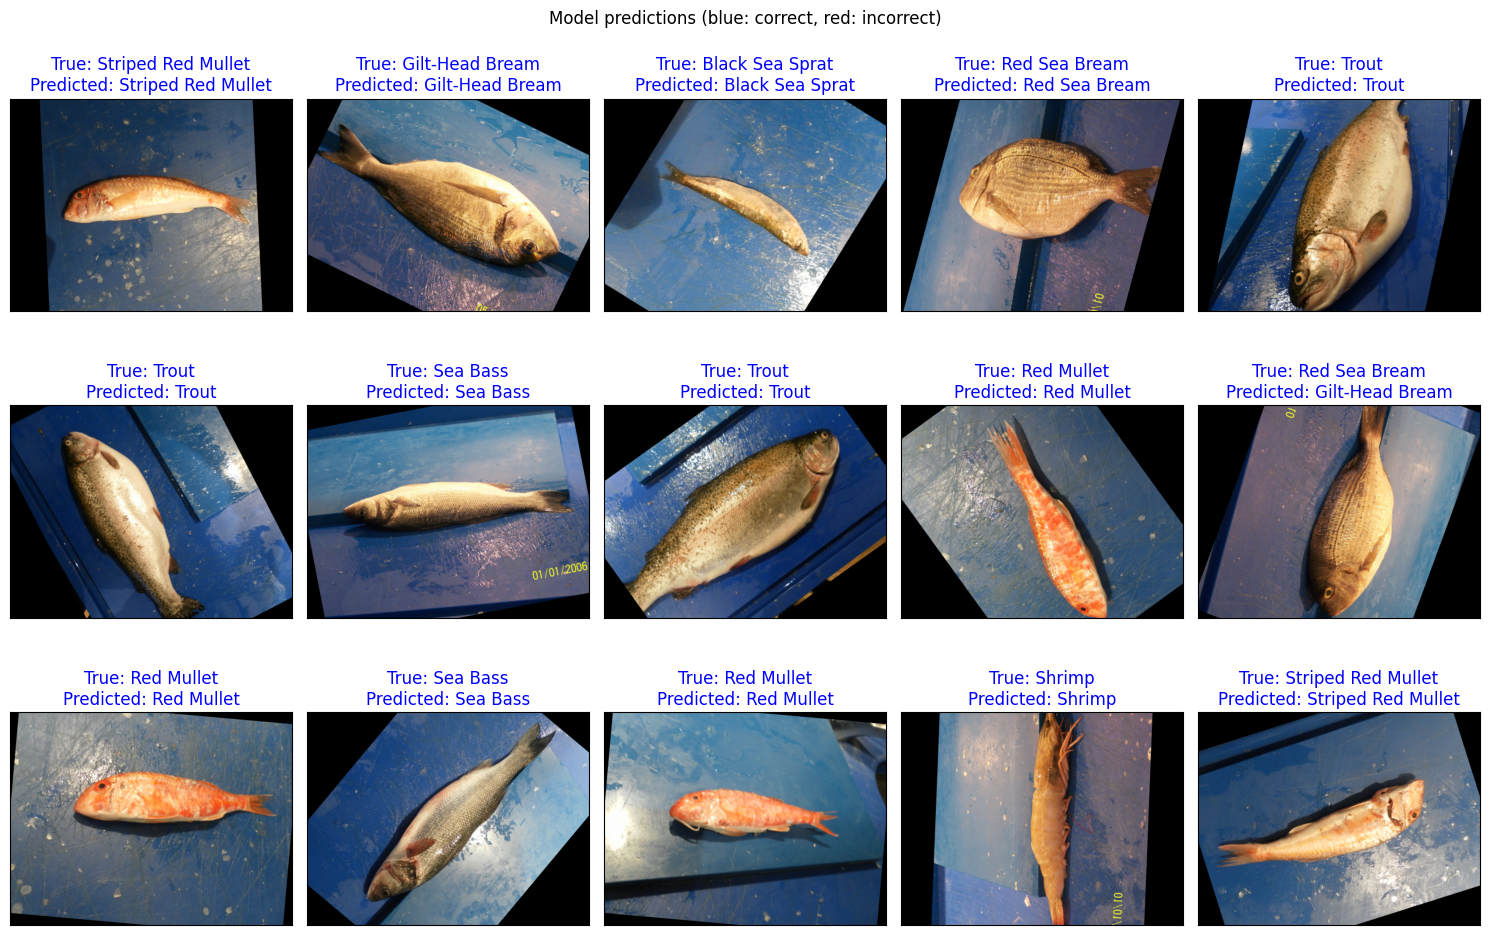

In [20]:

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10),subplot_kw={'xticks': [], 'yticks': []})

color = "blue" if pred2[i] == test_set.label.iloc[i] else "red"
for i, ax ,in enumerate(axes.flat):
    ax.imshow(plt.imread(test_set.image.iloc[i]))
    ax.set_title(f"True: {test_set.label.iloc[i]}\nPredicted: {pred2[i]}",color=color)
    
plt.subplots_adjust(hspace = 0.3)
plt.suptitle("Model predictions (blue: correct, red: incorrect)",y=0.98)
plt.tight_layout()
plt.show()

In [14]:
training_df,testing_df=train_test_split(images_df,test_size=0.1,shuffle=True,random_state=1)

print('The dimension of training data :',training_df.shape)
print('The dimension of testing data :',testing_df.shape)

The dimension of training data : (8100, 2)
The dimension of testing data : (900, 2)


# Image prediction

## Generating images for training and testing

In [15]:
training_generator=ImageDataGenerator(
                                     tf.keras.applications.vgg16.preprocess_input,
                                      validation_split=0.2,                                    
                                      )

testing_generator=ImageDataGenerator(
                                    tf.keras.applications.vgg16.preprocess_input
                                    )
                                    

In [16]:
training_images=training_generator.flow_from_dataframe(

    dataframe=training_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(224, 224),    
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
    
)


validation_images=training_generator.flow_from_dataframe(


    dataframe=training_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'

)


testing_images=testing_generator.flow_from_dataframe(


    dataframe=testing_df,
    x_col='Filepath',
    y_col='Label',
    class_mode='categorical',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    shuffle=False,
)

Found 6480 validated image filenames belonging to 9 classes.
Found 1620 validated image filenames belonging to 9 classes.
Found 900 validated image filenames belonging to 9 classes.


In [21]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=0,factor=0.1)

model_check_point=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5',save_best_only=True,verbose=True)

# VGG16 MODEL


In [44]:
pretrained_model=VGG16(

    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

In [46]:
epochs=7
batch_size=32

In [47]:
inputs=pretrained_model.input

x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)
x=Dropout(rate=0.3)(x)
x=BatchNormalization()(x)
x=Dense(64,activation='relu')(x)

outputs=Dense(9,activation='softmax')(x)


model=Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(
    
    training_images,
    validation_data=validation_images,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping,reduce_lr,model_check_point]

)

Epoch 1/7


203/203 [==============================] - ETA: 0s - loss: 0.7518 - accuracy: 0.7651
Epoch 1: val_accuracy improved from -inf to 0.97531, saving model to .\bestmodel.h5
203/203 [==============================] - 2246s 11s/step - loss: 0.7518 - accuracy: 0.7651 - val_loss: 0.1165 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 2/7
203/203 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9742  
Epoch 2: val_accuracy improved from 0.97531 to 0.99383, saving model to .\bestmodel.h5
203/203 [==============================] - 34998s 173s/step - loss: 0.0946 - accuracy: 0.9742 - val_loss: 0.0287 - val_accuracy: 0.9938 - lr: 0.0010
Epoch 3/7
203/203 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9872 
Epoch 3: val_accuracy did not improve from 0.99383
203/203 [==============================] - 4669s 23s/step - loss: 0.0473 - accuracy: 0.9872 - val_loss: 0.0282 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 4/7
203/203 [==========================

In [49]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## Fitting the model

In [24]:
history_df=pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy     lr
0  0.066410  0.978395  0.018531      0.991975  0.001
1  0.051019  0.981636  0.016861      0.994444  0.001
2  0.045963  0.984877  0.025671      0.990123  0.001
3  0.044647  0.985031  0.006482      0.998148  0.001
4  0.031635  0.988272  0.023256      0.991975  0.001

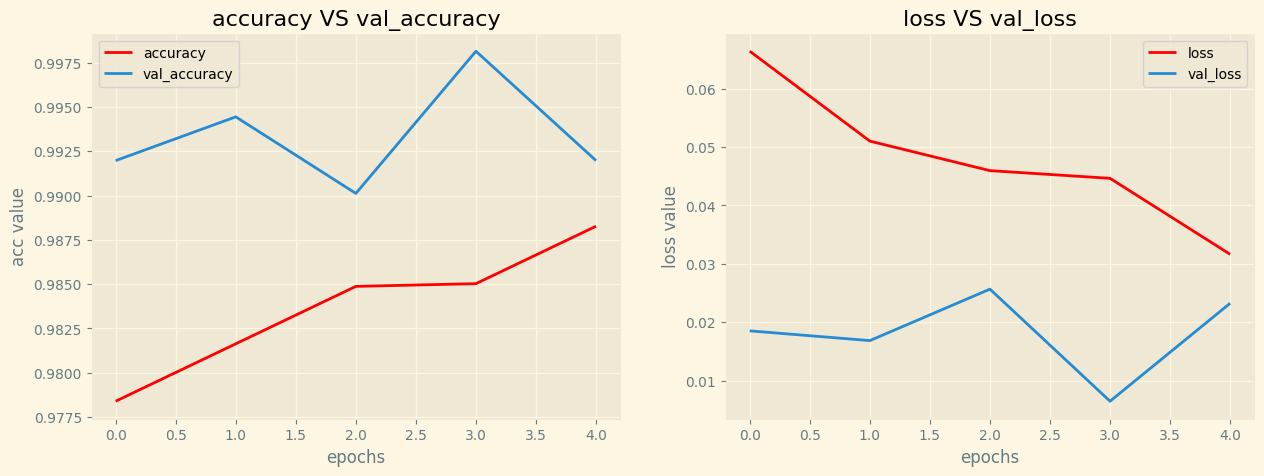

In [75]:
plt.figure(figsize=(15,5))

# plotting accuracy and val_accuracy
plt.subplot(1,2,1)
plt.plot(history_df['accuracy'],label='accuracy',c='red')
plt.plot(history_df['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('acc value')
plt.title('accuracy VS val_accuracy')
plt.legend()
# plotting loss and val_loss
plt.subplot(1,2,2)
plt.plot(history_df['loss'],label='loss',c='red')
plt.plot(history_df['val_loss'],label='val_loss')
plt.title('loss VS val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

plt.show()

## Model evaluation

In [29]:
from tensorflow.keras.models import load_model

model = load_model('bestmodel.h5')


In [74]:
Evaluation=model.evaluate(testing_images)


print("Test Accuracy: {:.2f}%".format(Evaluation[1] * 100))
print("Test Loss: {:.5f}".format(Evaluation[0]))

29/29 [==============================] - 180s 6s/step - loss: 0.0101 - accuracy: 0.9956
Test Accuracy: 99.56%
Test Loss: 0.01015


In [77]:
prediction=model.predict(testing_images)
prediction=np.argmax(prediction,axis=1)

29/29 [==============================] - 171s 6s/step


In [78]:
training_images.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [79]:
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
prediction = [labels[k] for k in prediction]

In [80]:
y_true=testing_df['Label'].values
print(classification_report(y_true,prediction))


                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00        94
   Gilt-Head Bream       0.97      1.00      0.99       111
   Hourse Mackerel       1.00      0.99      0.99        92
        Red Mullet       1.00      0.99      1.00       107
     Red Sea Bream       1.00      0.98      0.99       100
          Sea Bass       1.00      1.00      1.00        95
            Shrimp       1.00      1.00      1.00        94
Striped Red Mullet       0.99      1.00      0.99        99
             Trout       1.00      1.00      1.00       108

          accuracy                           1.00       900
         macro avg       1.00      1.00      1.00       900
      weighted avg       1.00      1.00      1.00       900



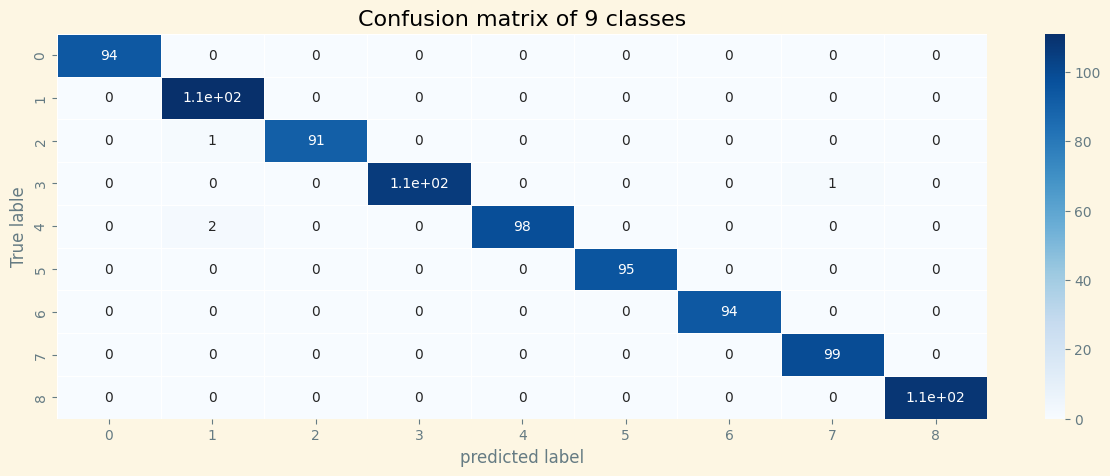

In [81]:
cm=confusion_matrix(y_true,prediction)
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,cmap='Blues',linewidths=0.5)
plt.xlabel('predicted label')
plt.ylabel('True lable')
plt.title('Confusion matrix of 9 classes')
plt.show()

In [82]:
temp_df=testing_df.copy()
temp_df['predicted']=prediction

temp_df.loc[temp_df['Label']==temp_df['predicted'],'Same'] = 'True'
temp_df.loc[temp_df['Label']!=temp_df['predicted'],'Same'] = 'False'
temp_df=temp_df.reset_index(drop=True)
temp_df.head()

Filepath  \
0      C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Sea Bream/Red Sea Bream\00643.png   
1  C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Hourse Mackerel/Hourse Mackerel\00342.png   
2                C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Sea Bass/Sea Bass\00026.png   
3            C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Mullet/Red Mullet\00262.png   
4            C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Mullet/Red Mullet\00030.png   

             Label        predicted  Same  
0    Red Sea Bream    Red Sea Bream  True  
1  Hourse Mackerel  Hourse Mackerel  True  
2         Sea Bass         Sea Bass  True  
3       Red Mullet       Red Mullet  True  
4       Red Mullet       Red Mullet  True

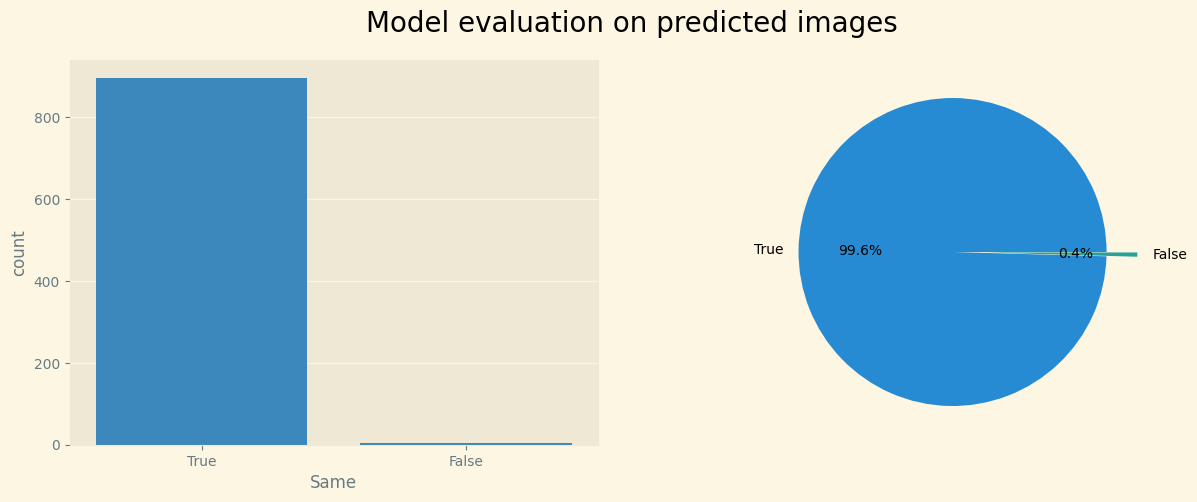

In [84]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data=temp_df,x='Same')

plt.subplot(1,2,2)
plt.pie(x=temp_df['Same'].value_counts().values,labels=temp_df['Same'].value_counts().index,autopct='%1.1f%%',explode=[0.1,0.1])

plt.suptitle('Model evaluation on predicted images',size=20)
plt.show()

In [91]:
def display_image(temp_df):
    
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(temp_df.Filepath.iloc[i]))
        ax.set_title(f"True: {temp_df.Label.iloc[i]}\nPredicted: {temp_df.predicted.iloc[i]}") 
    plt.tight_layout()
    plt.show()

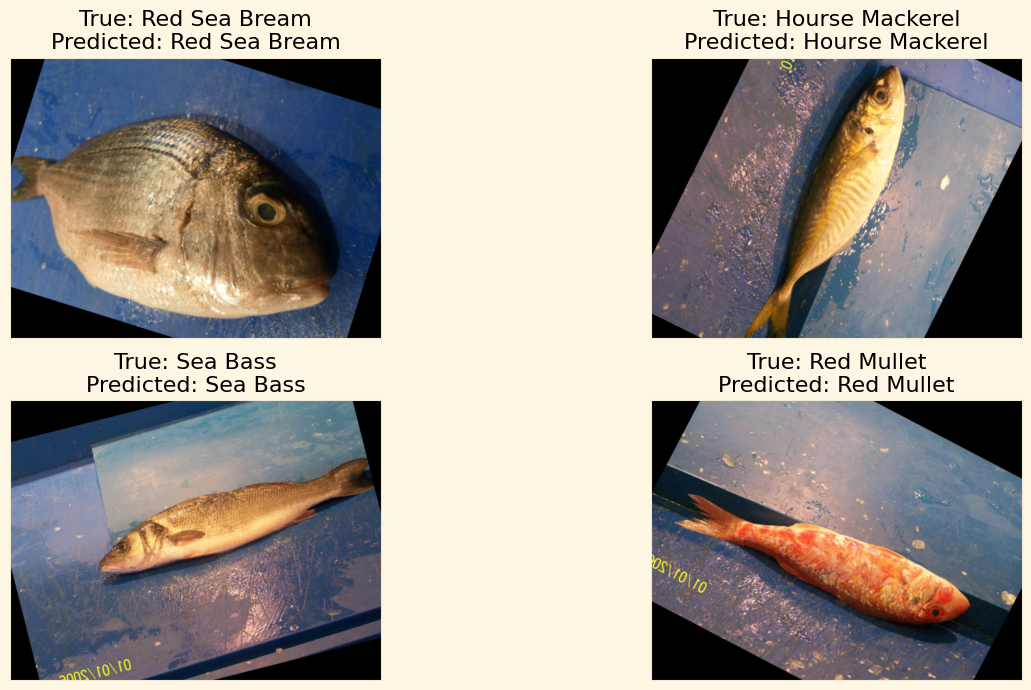

In [92]:
display_image(temp_df[temp_df['Same']=='True'])

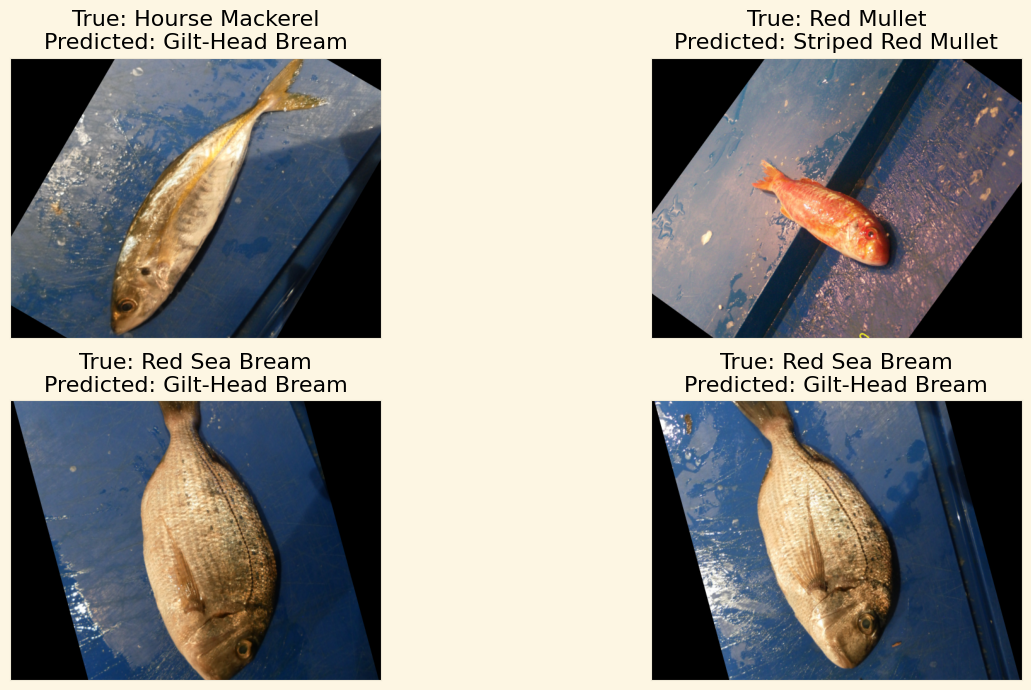

In [93]:
display_image(temp_df[temp_df['Same']=='False'])

# Predicting sample image

In [69]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


In [70]:
def make_prediction(model, image_array):
    predictions = model.predict(image_array)
    return predictions


In [71]:
from tensorflow.keras.applications.vgg16 import decode_predictions




def decode_predictions_top_n(predictions, top_n=3):
    # Assuming predictions is a 2D array with shape (1, 9)
    class_indices = np.argsort(predictions[0])[-top_n:][::-1]
    
    # You should have a mapping from class indices to class labels
    class_labels = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel","Red Mullet", "Red Sea Bream","Sea Bass","Shrimp","Striped Red Mullet","Trout"]
    
    decoded_predictions = [(class_labels[i], predictions[0][i]) for i in class_indices]
    
    return decoded_predictions

decoded_predictions = decode_predictions_top_n(predictions, top_n=3)




Predictions:


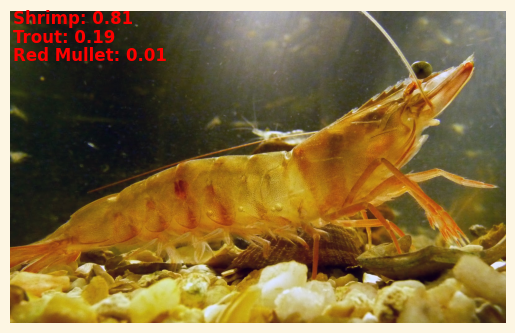

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_path = r"C:\Users\megav\OneDrive\Pictures\penaeid shrimp 001.jpg.crdownload"


img = mpimg.imread(image_path)


plt.imshow(img)
plt.axis('off')  


print("Predictions:")
for i, (label, score) in enumerate(decoded_predictions):
   # print(f"{i + 1}: {label} ({score:.2f})")

    # Overlay the label on the image
    plt.text(10, 40 + i * 60, f"{label}: {score:.2f}", color='red', fontsize=12, weight='bold')

plt.show()


# VGG16 Model With feature extraction PCA layer

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import VGG16
from sklearn.decomposition import PCA



# Define the base VGG16 model
base_model = VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze the layers of the base model
base_model.trainable = False

# Intermediate layer to perform feature selection
intermediate_layer_name = 'block5_conv3'
intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer(intermediate_layer_name).output)

# Number of components for PCA
n_components = 50  # Choose the number of components

# PCA layer
pca_layer = Dense(n_components, activation='linear', name='pca_layer')
# Define the rest of your model
x = intermediate_layer_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)

# Apply PCA to the features
pca_features = pca_layer(x)

# Output layer
outputs = Dense(9, activation='softmax')(pca_features)

# Combine the base model and the modified top layers
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [23]:
history=model.fit(
    
    training_images,
    validation_data=validation_images,
    epochs=5,
    batch_size=32,
    callbacks=[early_stopping,reduce_lr,model_check_point]

)

Epoch 1/5
203/203 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9784
Epoch 1: val_accuracy improved from 0.98025 to 0.99198, saving model to .\bestmodel.h5
203/203 [==============================] - 1715s 8s/step - loss: 0.0664 - accuracy: 0.9784 - val_loss: 0.0185 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 2/5
203/203 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9816
Epoch 2: val_accuracy improved from 0.99198 to 0.99444, saving model to .\bestmodel.h5
203/203 [==============================] - 1524s 8s/step - loss: 0.0510 - accuracy: 0.9816 - val_loss: 0.0169 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 3/5
203/203 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9849
Epoch 3: val_accuracy did not improve from 0.99444
203/203 [==============================] - 1593s 8s/step - loss: 0.0460 - accuracy: 0.9849 - val_loss: 0.0257 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 4/5
203/203 [==============================] -

In [50]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## History of the model in each epoch

In [51]:
history_df=pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy      lr
0  0.751802  0.765123  0.116487      0.975309  0.0010
1  0.094648  0.974228  0.028673      0.993827  0.0010
2  0.047339  0.987191  0.028158      0.992593  0.0010
3  0.034016  0.990432  0.034114      0.988889  0.0010
4  0.025654  0.991512  0.084714      0.971605  0.0010
5  0.018618  0.993519  0.007099      0.997531  0.0001
6  0.010814  0.997685  0.005319      0.999383  0.0001

## Visuallizing the performance of the model

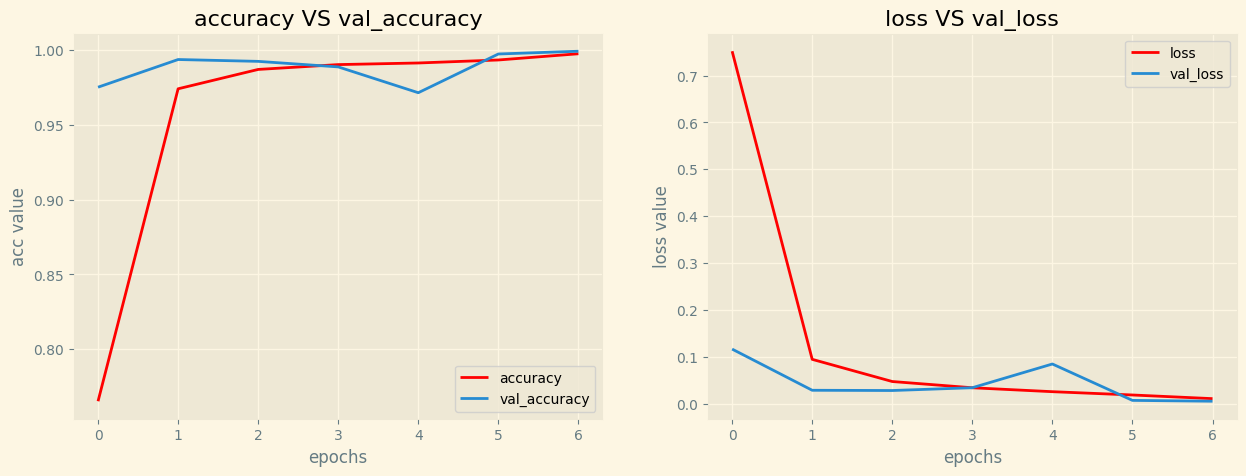

In [52]:
plt.figure(figsize=(15,5))

# plotting accuracy and val_accuracy
plt.subplot(1,2,1)
plt.plot(history_df['accuracy'],label='accuracy',c='red')
plt.plot(history_df['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('acc value')
plt.title('accuracy VS val_accuracy')
plt.legend()
# plotting loss and val_loss
plt.subplot(1,2,2)
plt.plot(history_df['loss'],label='loss',c='red')
plt.plot(history_df['val_loss'],label='val_loss')
plt.title('loss VS val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

plt.show()

In [54]:
from keras.models import load_model

model=load_model('bestmodel.h5')

## Evaluating model with testing images

In [55]:
Evaluation=model.evaluate(testing_images)


print("Test Accuracy: {:.2f}%".format(Evaluation[1] * 100))
print("Test Loss: {:.5f}".format(Evaluation[0]))

29/29 [==============================] - 284s 10s/step - loss: 0.0033 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.00326


In [56]:
prediction=model.predict(testing_images)
prediction=np.argmax(prediction,axis=1)

29/29 [==============================] - 172s 6s/step


In [57]:
training_images.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [58]:
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
prediction = [labels[k] for k in prediction]

## Classification report on Trained model

In [59]:
y_true=testing_df['Label'].values
print(classification_report(y_true,prediction))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00        91
   Gilt-Head Bream       1.00      1.00      1.00        94
   Hourse Mackerel       1.00      1.00      1.00        87
        Red Mullet       1.00      1.00      1.00       109
     Red Sea Bream       1.00      1.00      1.00       115
          Sea Bass       1.00      1.00      1.00       119
            Shrimp       1.00      1.00      1.00       105
Striped Red Mullet       1.00      1.00      1.00        86
             Trout       1.00      1.00      1.00        94

          accuracy                           1.00       900
         macro avg       1.00      1.00      1.00       900
      weighted avg       1.00      1.00      1.00       900



## Confusion Matrix

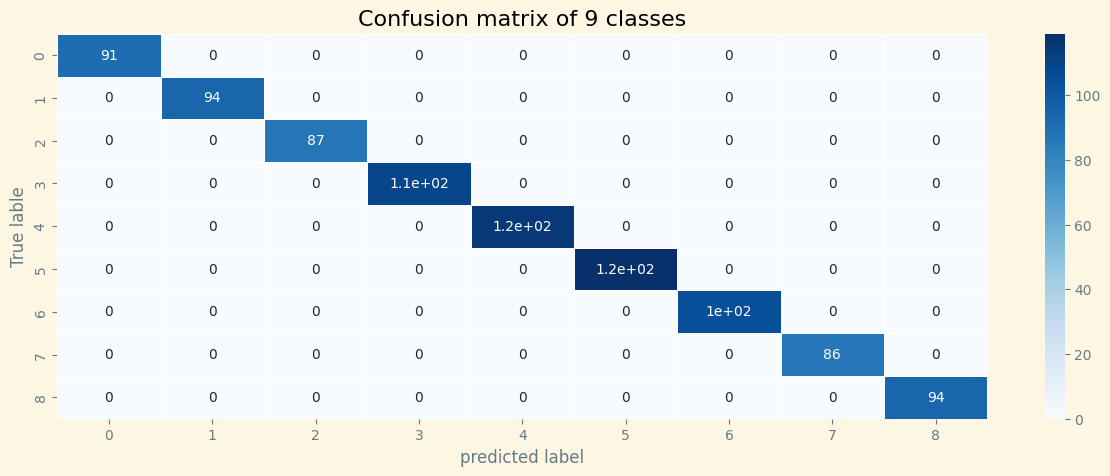

In [60]:
cm=confusion_matrix(y_true,prediction)
plt.figure(figsize=(15,5))
sns.heatmap(cm,annot=True,cmap='Blues',linewidths=0.5)
plt.xlabel('predicted label')
plt.ylabel('True lable')
plt.title('Confusion matrix of 9 classes')
plt.show()

## Dataframe to store predicted images

In [61]:
temp_df=testing_df.copy()
temp_df['predicted']=prediction

temp_df.loc[temp_df['Label']==temp_df['predicted'],'Same'] = 'True'
temp_df.loc[temp_df['Label']!=temp_df['predicted'],'Same'] = 'False'
temp_df=temp_df.reset_index(drop=True)
temp_df.head()

Filepath  \
0      C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Sea Bream/Red Sea Bream\00954.png   
1  C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Hourse Mackerel/Hourse Mackerel\00297.png   
2      C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Red Sea Bream/Red Sea Bream\00626.png   
3  C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Black Sea Sprat/Black Sea Sprat\00119.png   
4  C:\Users\megav\Downloads\largescalefishdataset - Copy\Fish_Dataset\Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream\00206.png   

             Label        predicted  Same  
0    Red Sea Bream    Red Sea Bream  True  
1  Hourse Mackerel  Hourse Mackerel  True  
2    Red Sea Bream    Red Sea Bream  True  
3  Black Sea Sprat  Black Sea Sprat  True  
4  Gilt-Head Bream  Gilt-Head Bream  True

## Model evaluation 

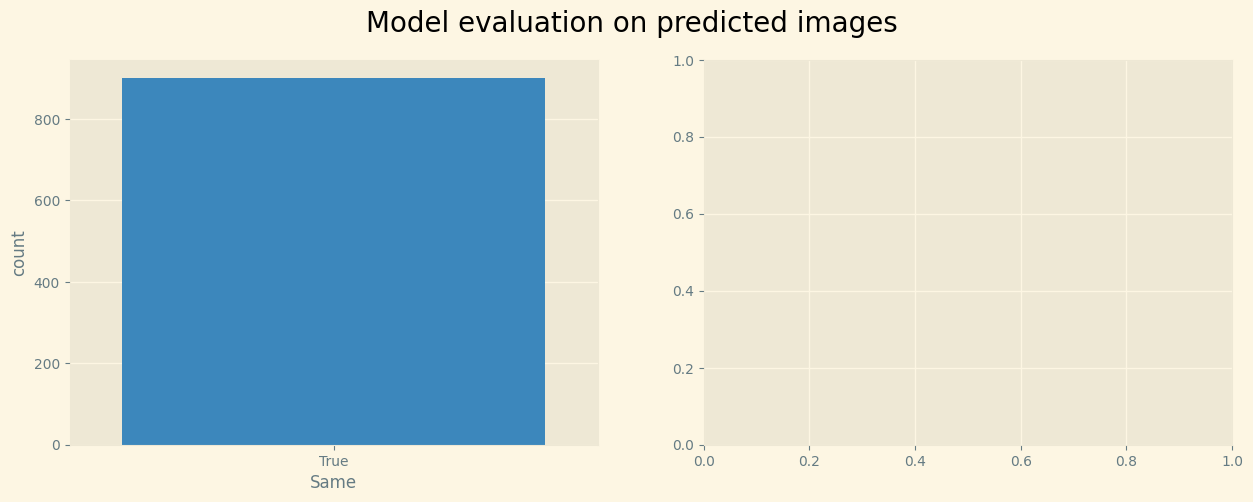

In [64]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(data=temp_df,x='Same')

plt.subplot(1,2,2)
#plt.pie(x=temp_df['Same'].value_counts().values,labels=temp_df['Same'].value_counts().index,autopct='%1.1f%%',explode=[0.1,0.1])

plt.suptitle('Model evaluation on predicted images',size=20)
plt.show()

## Function to display VGG16 model predicted images

In [65]:
def display_image(temp_df):
    
    '''
    input : data frame 
    
    output : display 8 images from data frame with 
    '''
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(plt.imread(temp_df.Filepath.iloc[i]))
        ax.set_title(f"True: {temp_df.Label.iloc[i]}\nPredicted: {temp_df.predicted.iloc[i]}") 
    plt.tight_layout()
    plt.show()

## Displaying correctly predicted image of VGG16 model

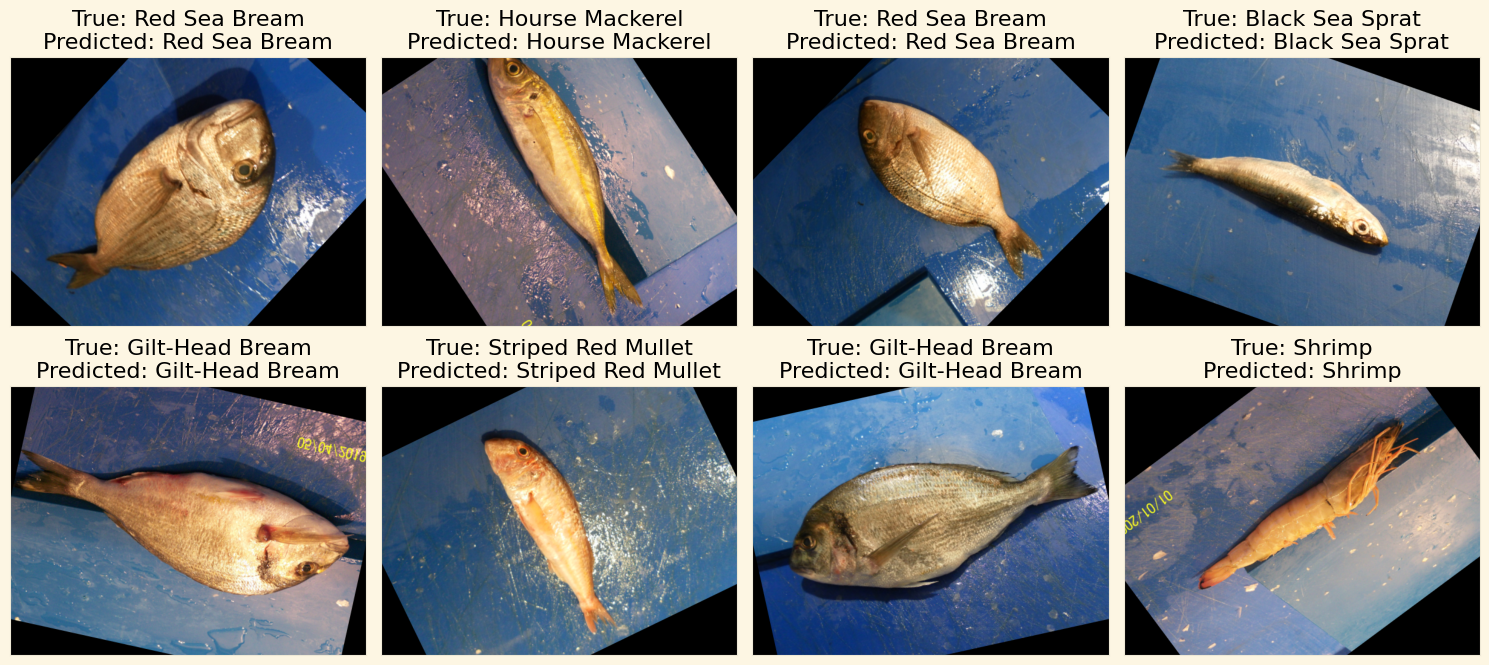

In [66]:
display_image(temp_df[temp_df['Same']=='True'])

# Gradient-weighted Class Activation Mapping

In [3]:
import matplotlib.cm as cm

def get_img_array(img_path, size):
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # creating a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then,computing the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # multiplying each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    
    heatmap = np.uint8(255 * heatmap)

   
    jet = cm.get_cmap("jet")

   
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

   
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = array_to_img(superimposed_img)

    
    superimposed_img.save(cam_path)

    
    return cam_path
    
preprocess_input = tf.keras.applications.vgg16.preprocess_input
decode_predictions = tf.keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_conv3"#from model summary
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].activation = None

## Function to display images with gram-cam heatmap 

In [69]:
def display_heatmap_image(df):
    
    '''
    input : data frame 
    
    output : display 8 grad-cam images from data frame with 
    '''
    
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        img_path = df.Filepath.iloc[i]
        img_array = preprocess_input(get_img_array(img_path, size=img_size))
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
        cam_path = save_and_display_gradcam(img_path, heatmap)
        ax.imshow(plt.imread(cam_path))
        ax.set_title(f"True: {df.Label.iloc[i]}\nPredicted: {df.predicted.iloc[i]}")
    plt.tight_layout()
    plt.show()

## Visualizing images with Grad-cam heatmap

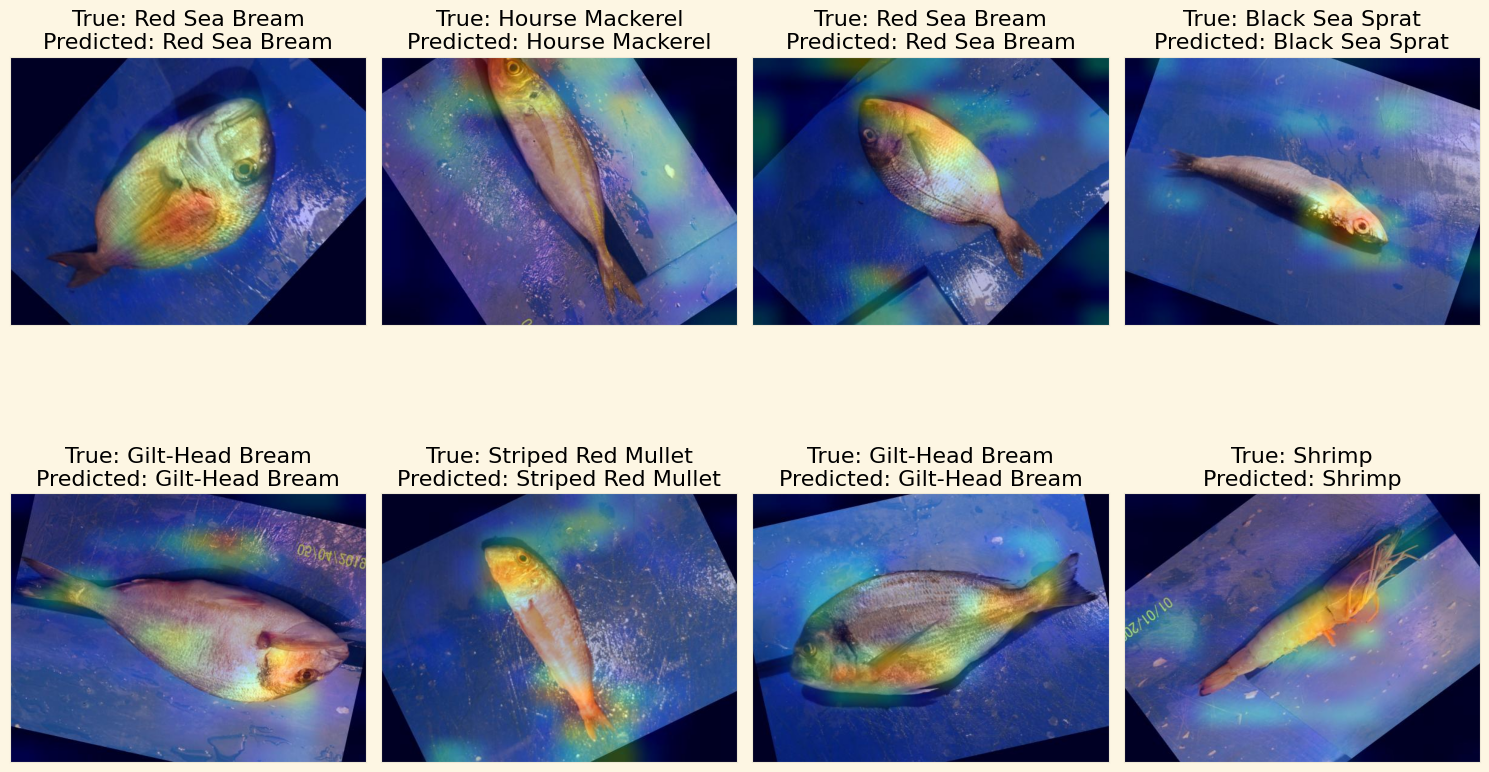

In [70]:
display_heatmap_image(temp_df[temp_df['Same']=='True'])